In [1]:
import networkx as nx
import osmnx as ox
from random import choices

%matplotlib inline
ox.__version__

'1.4.0'

In [2]:
from search_information import SearchInformation

2.9499510289725555


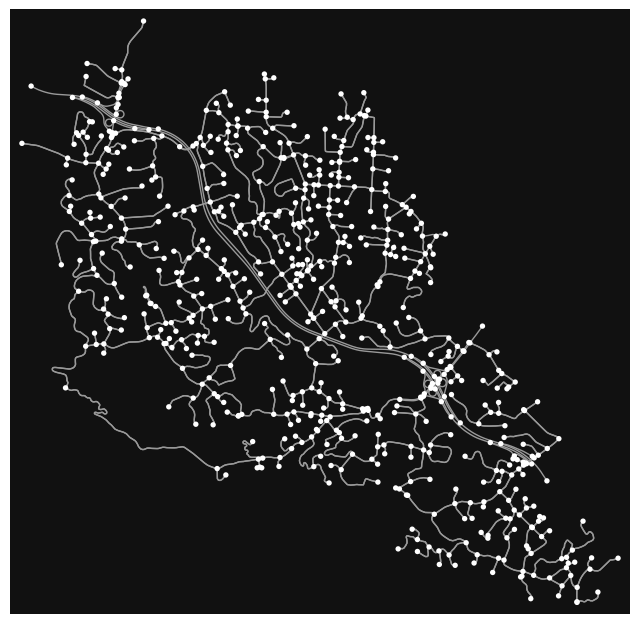

In [3]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place(
    {'city': 'Los Altos Hills', 'state': 'California'}, network_type="drive", truncate_by_edge=True)
fig, ax = ox.plot_graph(G)

In [4]:
G_info = SearchInformation(G)
G_info.compute_average_search_information()

In [10]:
print(G_info.average_search_information)

22.612138822654103


In [431]:
random_nodes = choices(list(G.nodes()), k=2)

print(f'Start Node: {random_nodes[0]}\nTarget Node: {random_nodes[1]}')

route = nx.shortest_path(G, random_nodes[0],
                         random_nodes[1], weight='lenght/maxspeed[0]')

ox.plot_graph_route(G, route=route)


Start Node: 30677846
Target Node: 65579426


NetworkXNoPath: No path between 30677846 and 65579426.